In [1]:
# Read file
import pandas as pd

raw_data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv', index_col='id')

# Print out 5 rows
raw_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [3]:
raw_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
# Delete ID column
'''
Done while reading file
'''

'\nDone while reading file\n'

In [5]:
for column in raw_data.columns:
    # Change columns names to lowercase
    raw_data.rename(columns={column: column.lower()}, inplace=True)

In [6]:
# Get the list of numeric values
num_values = [col for col in raw_data.columns if raw_data[col].dtype in ['float64', 'int64']]
print(num_values)

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [7]:
# Get the list of string values
str_values = [col for col in raw_data.columns if raw_data[col].dtype in ['str', 'object']]
print(str_values)

['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']


In [8]:
# Delete rows with NaN
raw_data.dropna(inplace=True, subset=['bmi'])

In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [10]:
raw_data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
# Normalize (Do it in a pipeline)
# 
raw_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
raw_data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
# Get unique values for object columns
unique_values_per_column = {col: raw_data[col].unique() for col in str_values}

# Display unique values for each column
for col, unique_vals in unique_values_per_column.items():
    print(f"Unique values in '{col}': {unique_vals}")

Unique values in 'gender': ['Male' 'Female' 'Other']
Unique values in 'ever_married': ['Yes' 'No']
Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in 'residence_type': ['Urban' 'Rural']
Unique values in 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [14]:
raw_data['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [15]:
raw_data['ever_married'].value_counts()

ever_married
Yes    3204
No     1705
Name: count, dtype: int64

In [16]:
raw_data['work_type'].value_counts()


work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64

In [17]:
raw_data['residence_type'].value_counts(normalize=True)

residence_type
Urban    0.507232
Rural    0.492768
Name: proportion, dtype: float64

In [18]:
raw_data['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [19]:
# Transfrom dataframe
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()
ohe = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

num_values_to_transform = ['age', 'avg_glucose_level', 'bmi']

raw_data[num_values_to_transform] = scaler.fit_transform(raw_data[num_values_to_transform])
# raw_data[str_values] = ohe.fit_transform(raw_data[str_values])

raw_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,1.070138,0,1,Yes,Private,Urban,2.777698,0.981345,formerly smoked,1
31112,Male,1.646563,0,1,Yes,Private,Rural,0.013842,0.459269,never smoked,1
60182,Female,0.272012,0,0,Yes,Private,Urban,1.484132,0.701207,smokes,1
1665,Female,1.602222,1,0,Yes,Self-employed,Rural,1.549193,-0.623083,never smoked,1
56669,Male,1.690903,0,0,Yes,Private,Urban,1.821368,0.013595,formerly smoked,1


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_values_to_transform = ['age', 'avg_glucose_level', 'bmi']

ct = ColumnTransformer(transformers=[
    ('scale', StandardScaler(), num_values_to_transform),
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore'), str_values)],
    remainder='passthrough'
)

# raw_data_ct = ct.fit_transform(raw_data)
# raw_data_ct
ct

ColumnTransformer(remainder='passthrough',
                  transformers=[('scale', StandardScaler(),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('onehot', OneHotEncoder(),
                                 ['gender', 'ever_married', 'work_type',
                                  'residence_type', 'smoking_status'])])

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=4, verbose=1)

model_pipeline = Pipeline(steps=[
    ('preprocessor', ct),
    ('classifier', rfc)
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'residence_type',
                                                   'smoking_status'])])),
                ('classifier',
                 RandomForestClassifier(n_jobs=4, random_state=42, verbose=1))])

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate


X = raw_data.drop('stroke', axis=1)
y = raw_data['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scoring = ['neg_log_loss', 'roc_auc', 'accuracy', 'balanced_accuracy']
cv_results = cross_validate(model_pipeline, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)
cv_result = pd.DataFrame(cv_results)
cv_result

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_job

,fit_time,score_time,test_neg_log_loss,train_neg_log_loss,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
0,0.242126,0.098428,-0.218856,-0.030485,0.803909,1.0,0.961832,1.0,0.516129,1.0
1,0.259258,0.019950,NaN,-0.030068,NaN,1.0,NaN,1.0,NaN,1.0
2,0.245000,0.096991,-0.226970,-0.029766,0.786643,1.0,0.959236,1.0,0.499337,1.0
3,0.231419,0.096937,-0.429248,-0.030015,0.728395,1.0,0.957962,1.0,0.498674,1.0
4,0.232789,0.080883,-0.349180,-0.030361,0.749209,1.0,0.960510,1.0,0.500000,1.0


In [23]:
cv_result.sort_values(by='test_neg_log_loss', ascending=False)

,fit_time,score_time,test_neg_log_loss,train_neg_log_loss,test_roc_auc,train_roc_auc,test_accuracy,train_accuracy,test_balanced_accuracy,train_balanced_accuracy
0,0.242126,0.098428,-0.218856,-0.030485,0.803909,1.0,0.961832,1.0,0.516129,1.0
2,0.245000,0.096991,-0.226970,-0.029766,0.786643,1.0,0.959236,1.0,0.499337,1.0
4,0.232789,0.080883,-0.349180,-0.030361,0.749209,1.0,0.960510,1.0,0.500000,1.0
3,0.231419,0.096937,-0.429248,-0.030015,0.728395,1.0,0.957962,1.0,0.498674,1.0
1,0.259258,0.019950,NaN,-0.030068,NaN,1.0,NaN,1.0,NaN,1.0


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Paul\miniconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Paul\miniconda3\envs\tf\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Paul\miniconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Paul\miniconda3\envs\tf\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing 

In [20]:
raw_data['smoking_status'].value_counts()

smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64

In [21]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder


# Initialize the Pipeline
categorical_pipeline = Pipeline([
    ('OneHotEncoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore'))
])

col_trans = ColumnTransformer([
    ('categorical', categorical_pipeline, remainder='passthrough')
])

categorical_pipeline.fit_transform(raw_data, )

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

categorical_pipeline = Pipeline([
    # ('SimpleImputer', SimpleImputer(missing_values='Unknown', strategy='most_frequent')),
    ('OneHotEncoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore')),
])

numerical_pipeline = Pipeline([
    ('KNNImputer', KNNImputer(n_neighbors=7, weights='distance')),
    ('StandardScaler', StandardScaler())
])


What to do with outliers?
Gender: Only on representative observation = Other
Ever_married
Build dependacy graph for each predictor (its values) and Haveing or not a Stroke.

C:\Users\Paul\AppData\Local\Temp\ipykernel_17168\3233794159.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=raw_data[predictor], y=raw_data[target], ci=None)


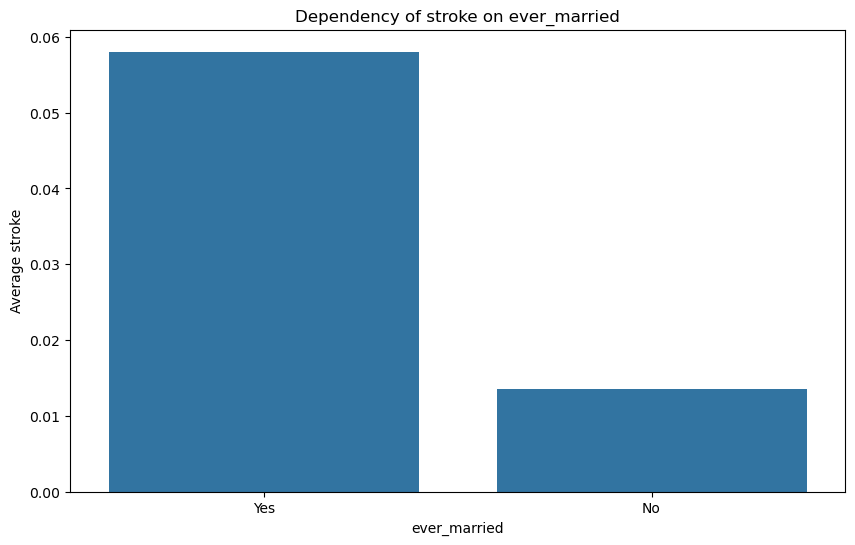

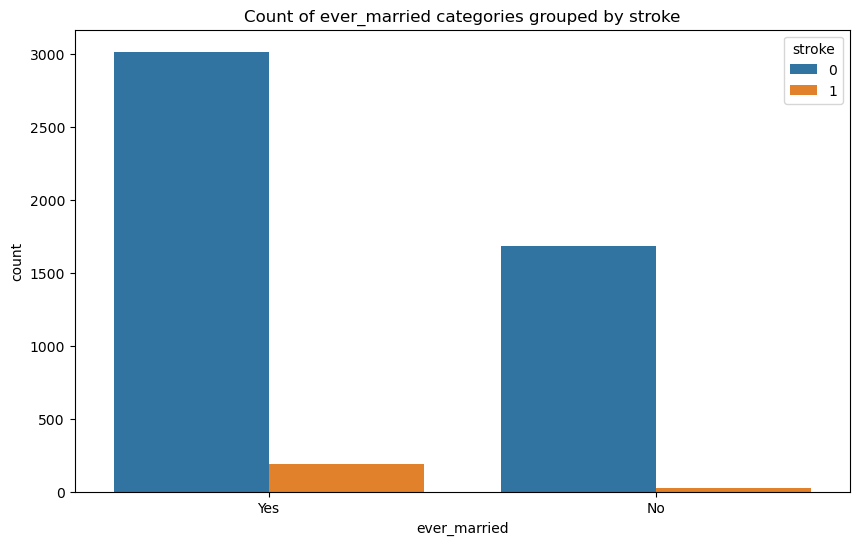

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


# Bar plot for categorical predictor
predictor = 'ever_married'
target = 'stroke'

plt.figure(figsize=(10, 6))
sns.barplot(x=raw_data[predictor], y=raw_data[target], ci=None)
plt.title(f'Dependency of {target} on {predictor}')
plt.xlabel(predictor)
plt.ylabel(f'Average {target}')
plt.show()

# Count plot for category frequency
plt.figure(figsize=(10, 6))
sns.countplot(x=raw_data[predictor], hue=raw_data[target])
plt.title(f'Count of {predictor} categories grouped by {target}')
plt.show()